(Working on SDEvelo)
2024-09-13 15:28:14
cuda
Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:02:39) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
5000
Epoch: 0, Loss: 0.903, alpha: 0.01, beta: 2.13, gamma: 0.01, s1: 0.020, s2: 0.028,  t_m: 0.680,  u_shift: 0.000,  s_shift: 0.000
Epoch: 50, Loss: 0.433, alpha: 2.16, beta: 19.33, gamma: 8.06, s1: 0.031, s2: 0.010,  t_m: 0.351,  u_shift: 0.000,  s_shift: 0.000
Epoch: 100, Loss: 0.507, alpha: 2.20, beta: 25.83, gamma: 11.08, s1: 0.096, s2: 0.023,  t_m: 0.391,  u_shift: 0.000,  s_shift: 0.000
Epoch: 150, Loss: 0.485, alpha: 2.54, beta: 32.08, gamma: 14.05, s1: 0.130, s2: 0.032,  t_m: 0.424,  u_shift: 0.000,

  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:01) --> added
    'sde_velocity_umap', embedded velocity vectors (adata.obsm)


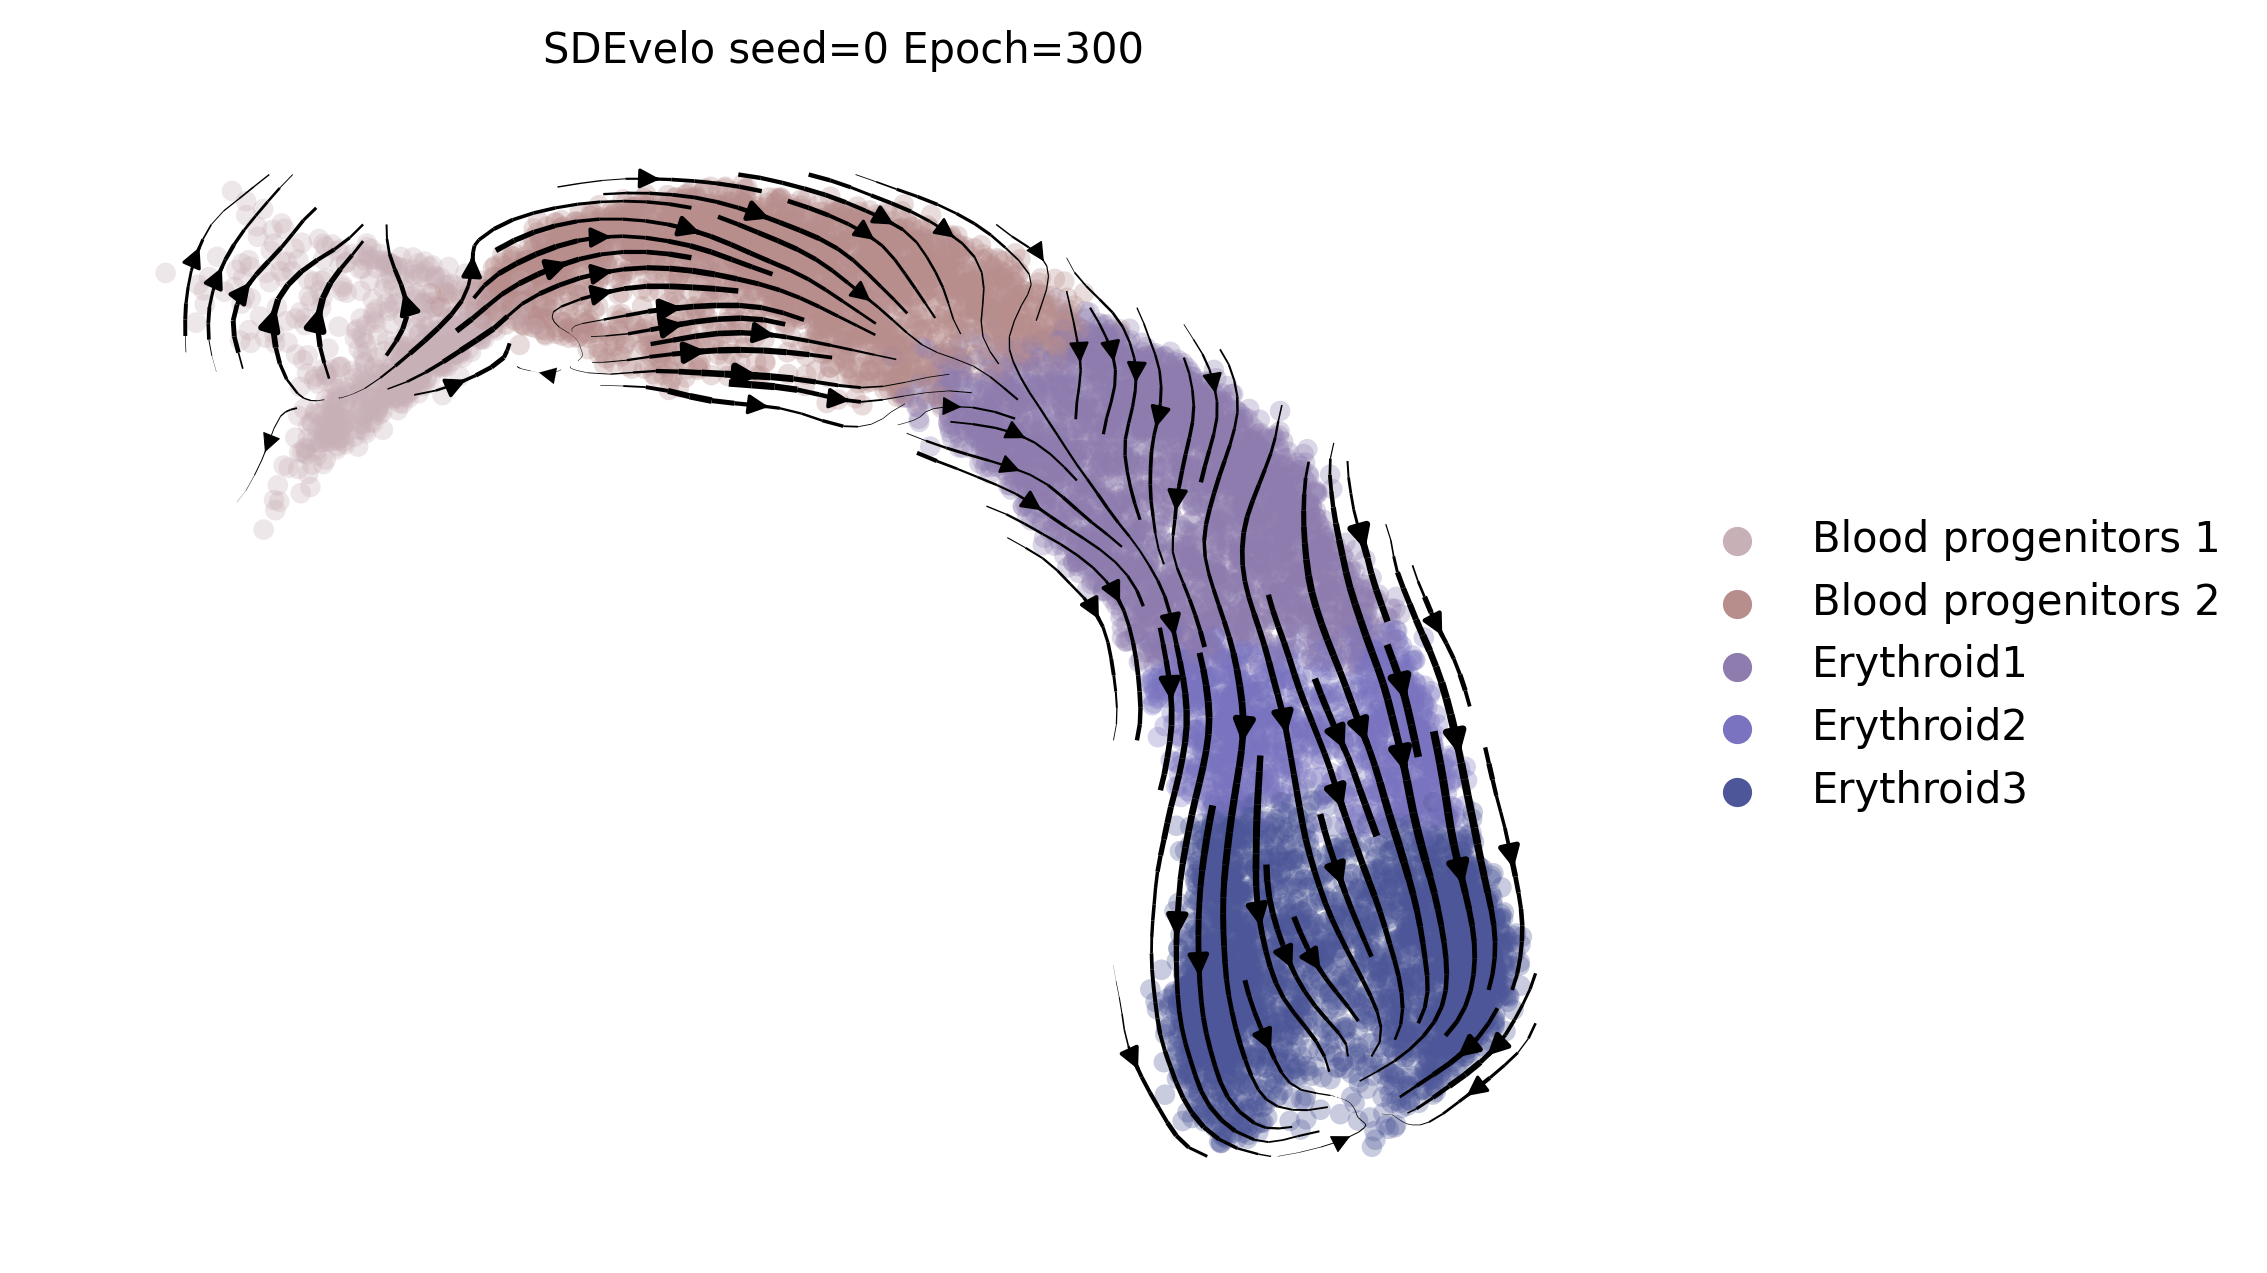

In [1]:
import sv
import scvelo as scv
adata = scv.datasets.gastrulation_erythroid()

args = sv.Config()

args.vis_type_col = 'celltype'
args.vis_key = 'X_umap'
scv.pp.remove_duplicate_cells(adata)

model = sv.SDENN(args, adata)
adata = model.train(args.nEpochs)

color_list = ["#c8b0b7", "#b88e8d", "#8e7caf", "#7973c0", "#4c5698"]
adata.uns['celltype_colors'] = {cell_type: color_list[i] for i, cell_type in enumerate(adata.obs['celltype'].cat.categories.tolist())}

kwargs = dict(add_margin=.1, figsize=(7, 5))
sv.plot_streamline(adata, args, **kwargs)

computing velocity graph (using 10/128 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:09) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
computing velocity embedding
    finished (0:00:01) --> added
    'sde_velocity_umap', embedded velocity vectors (adata.obsm)


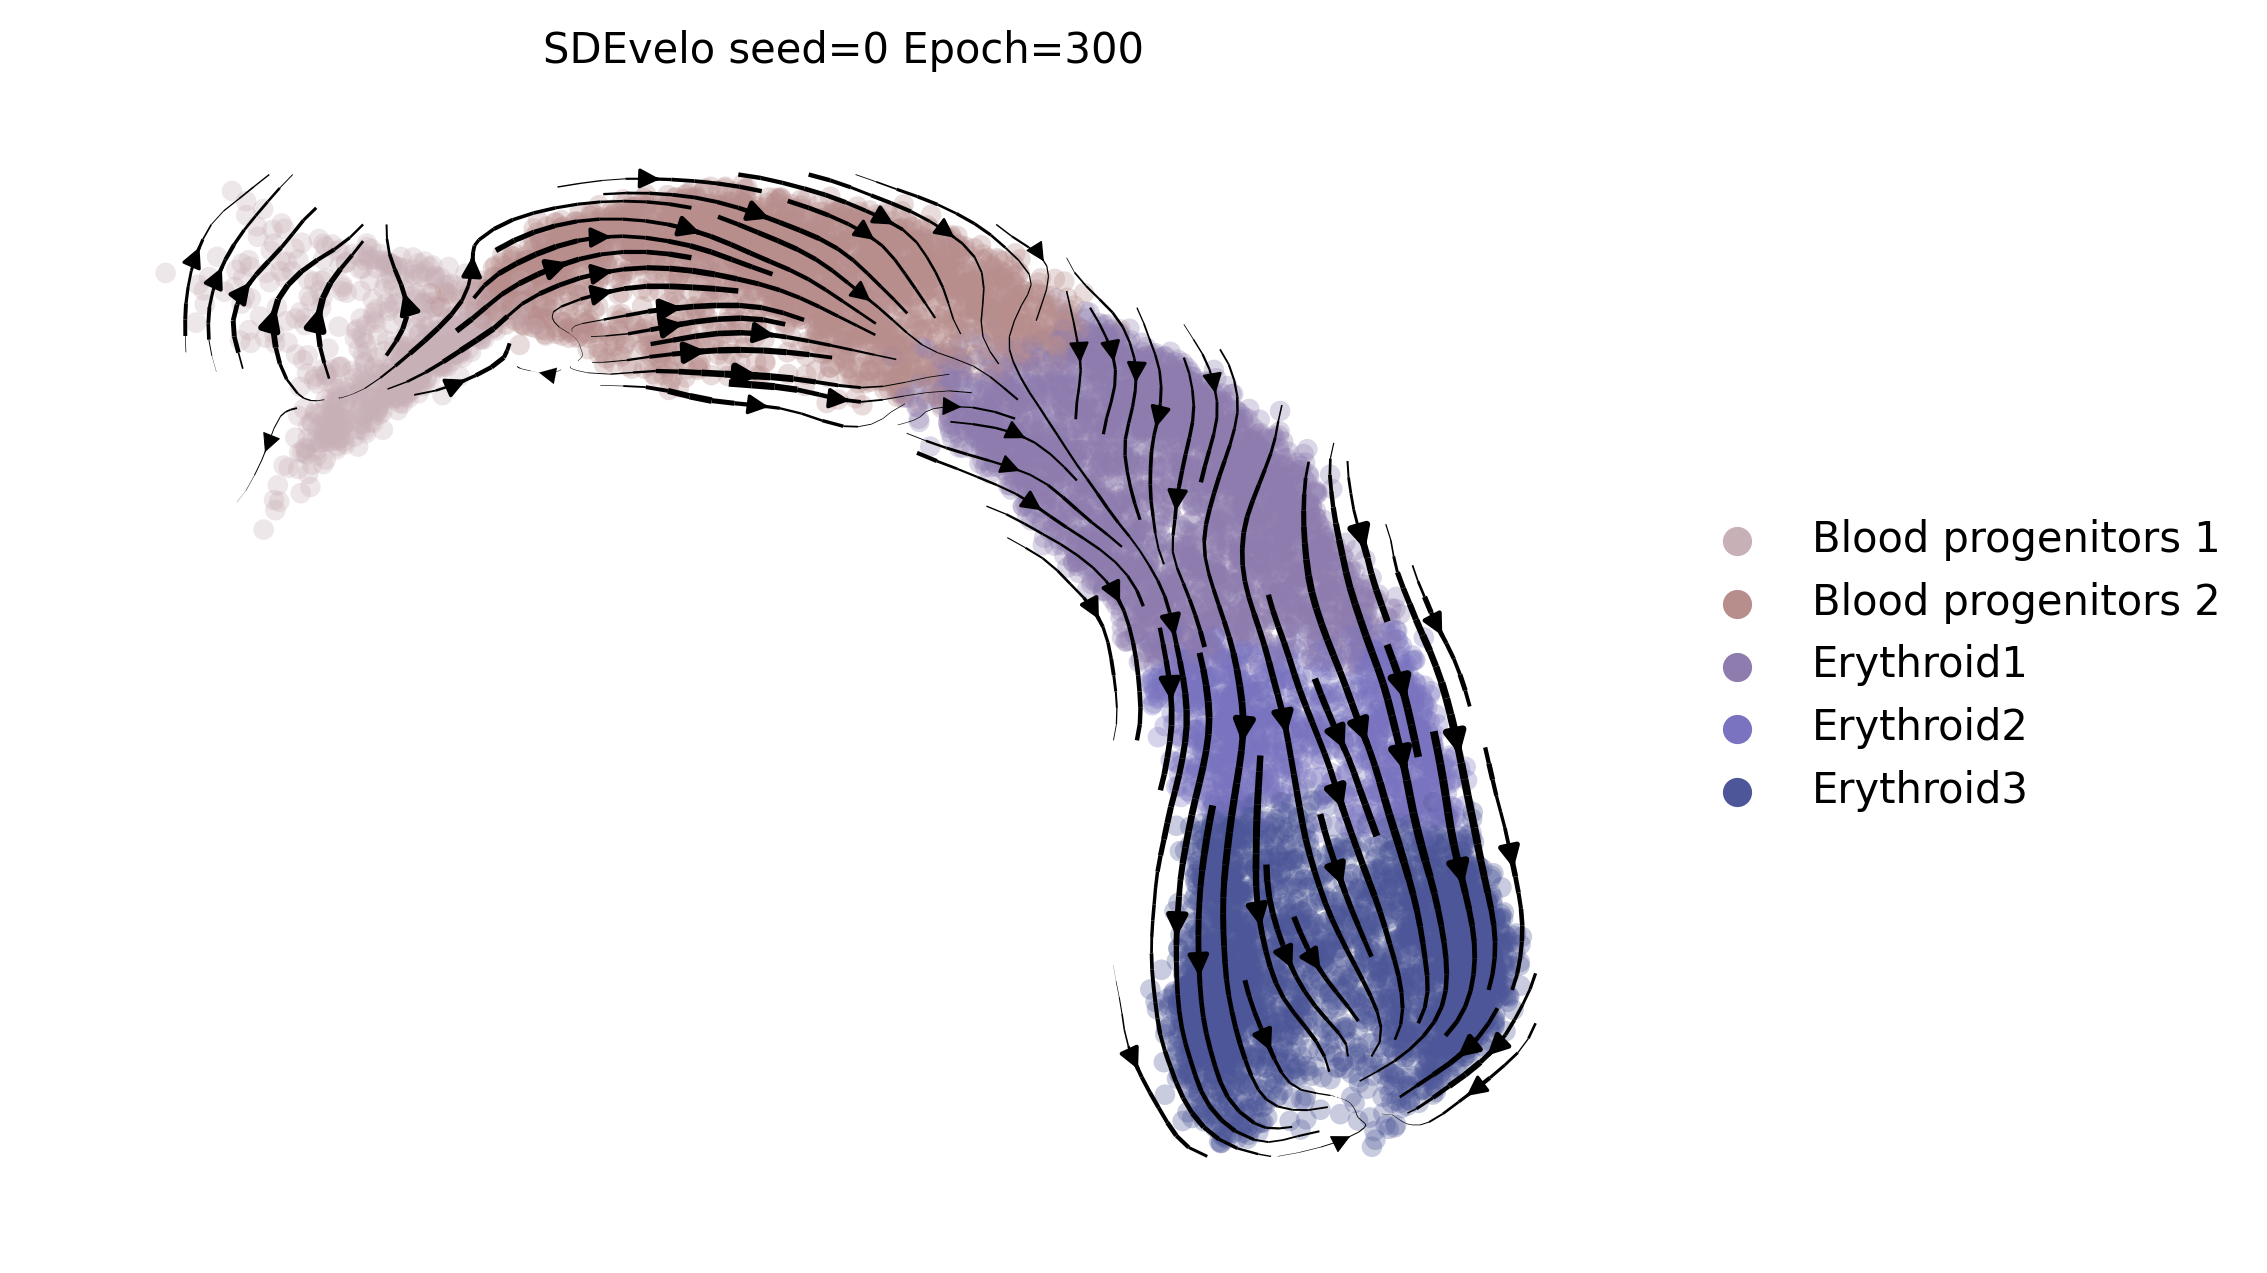

In [2]:
kwargs = dict(add_margin=.1, figsize=(7, 5))
sv.plot_streamline(adata, args, **kwargs)

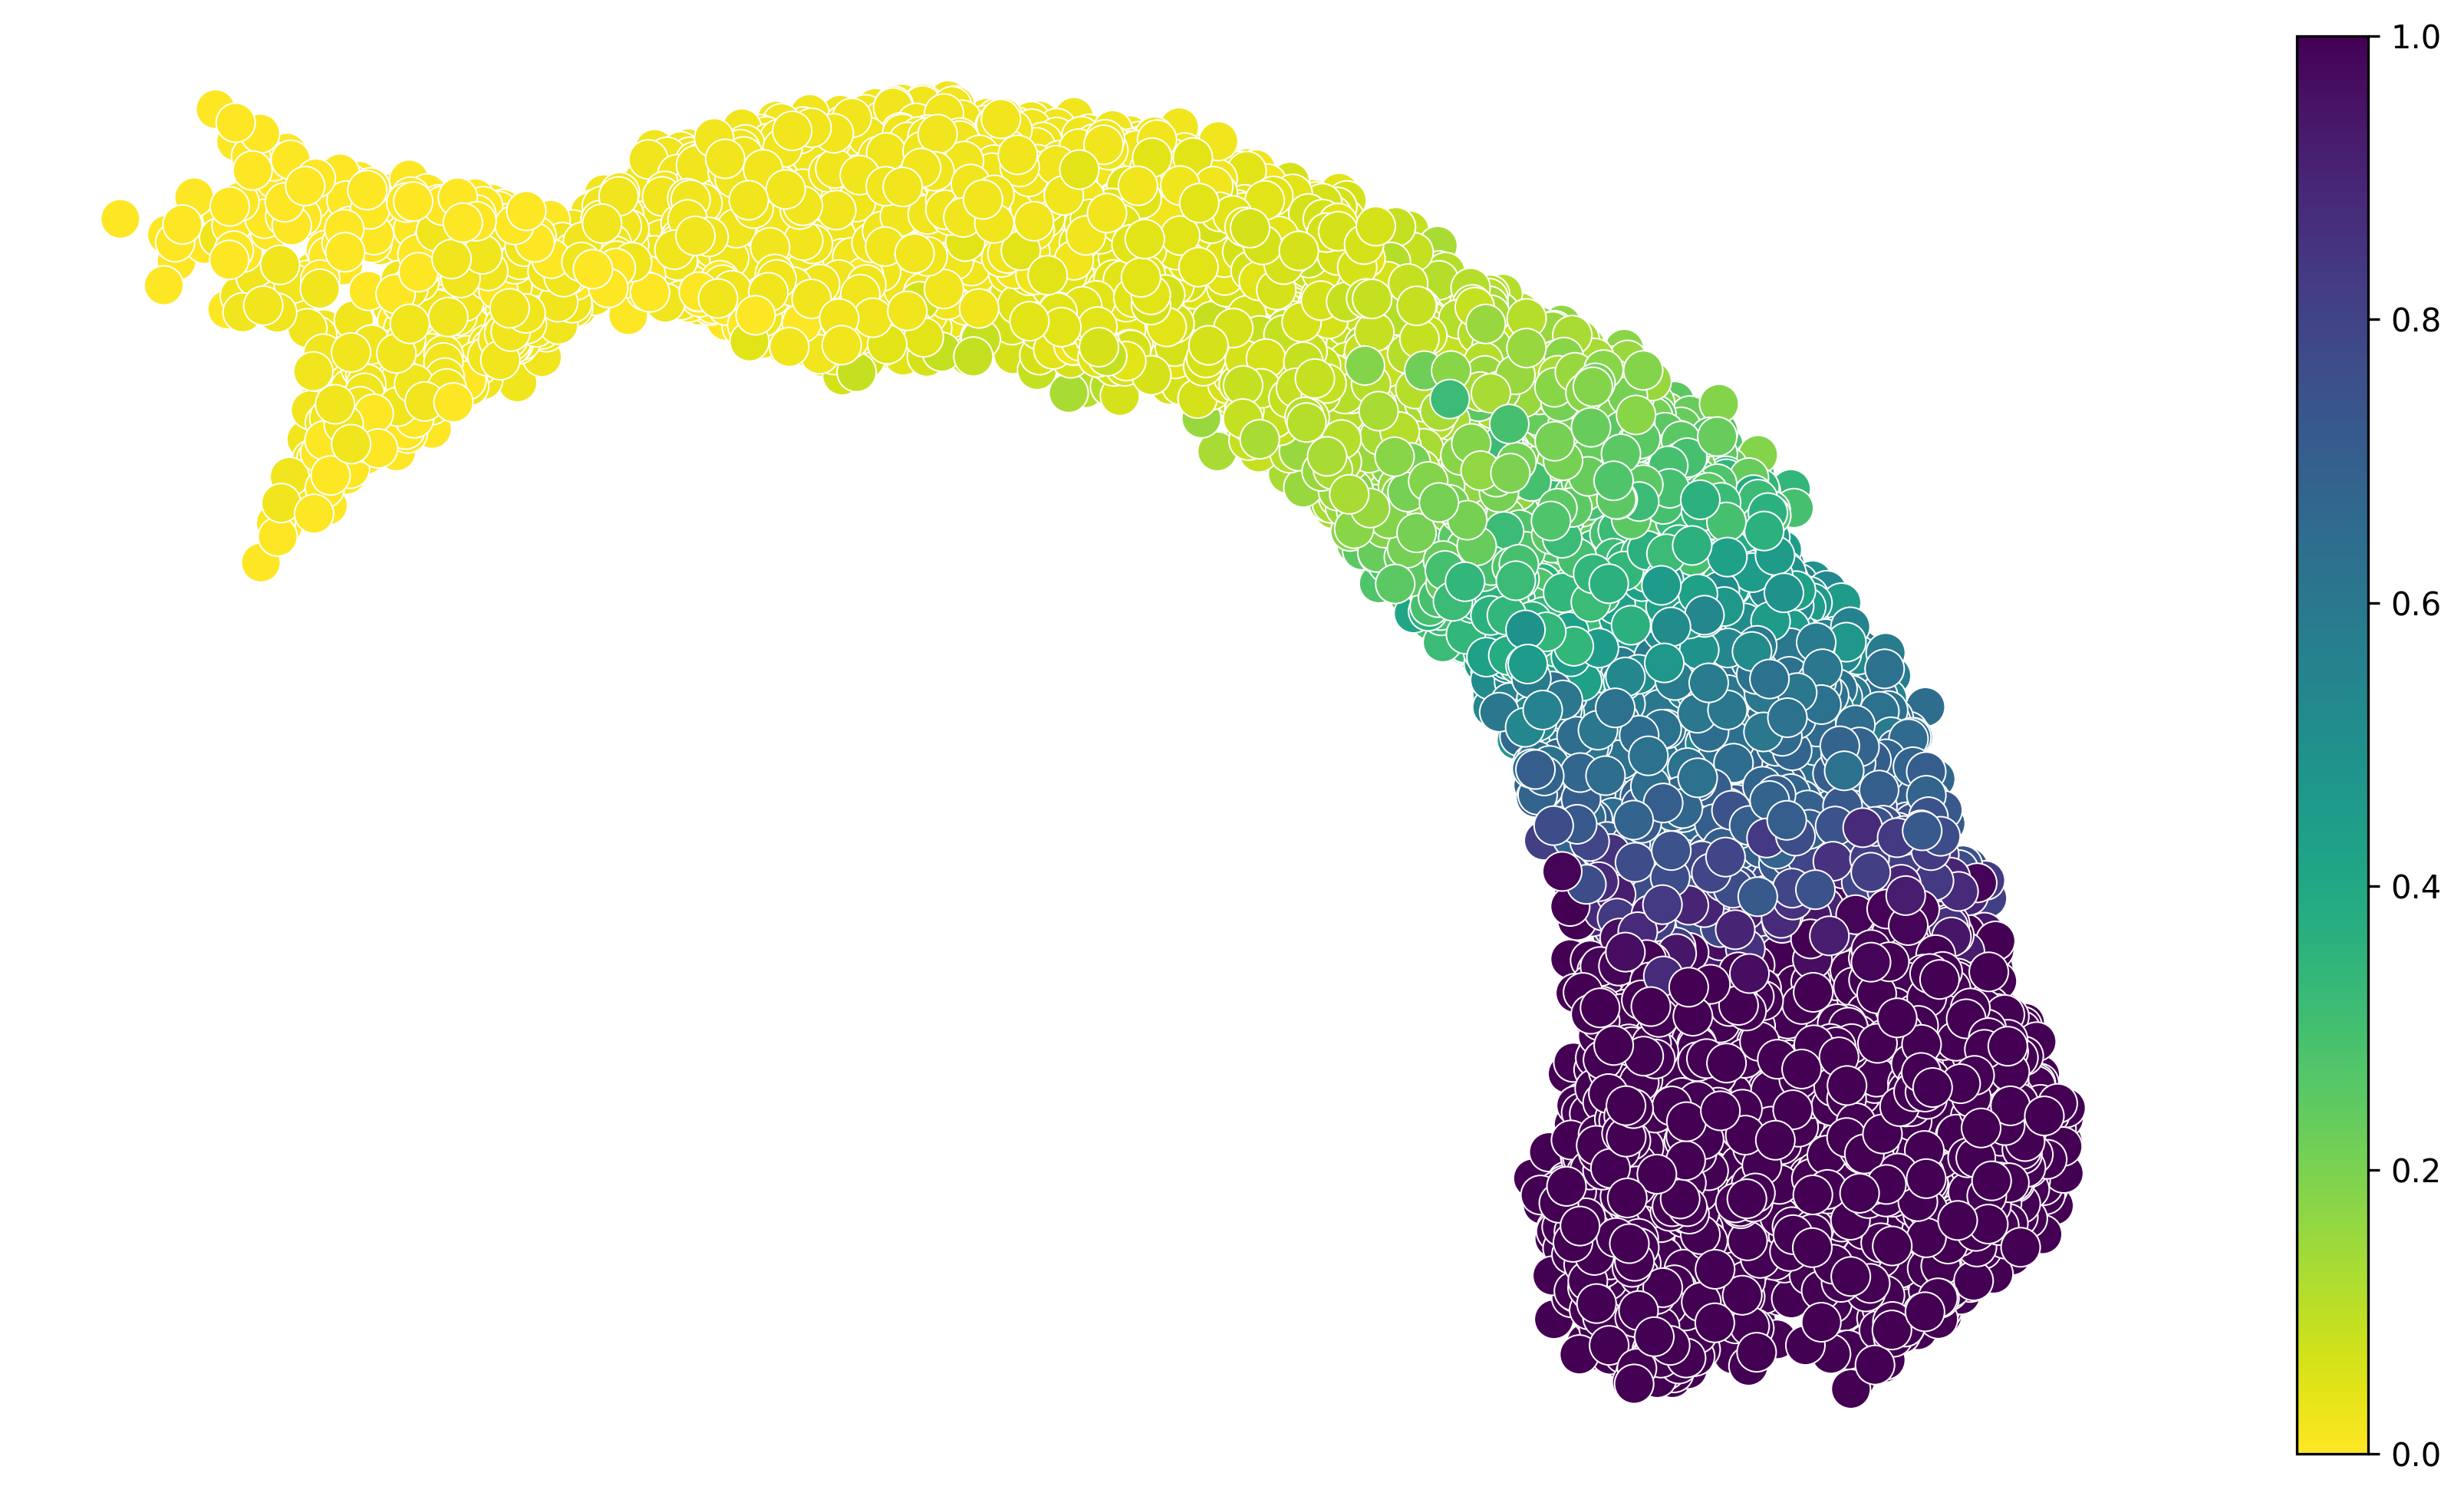

In [3]:
sv.plot_latent_time(adata, args)

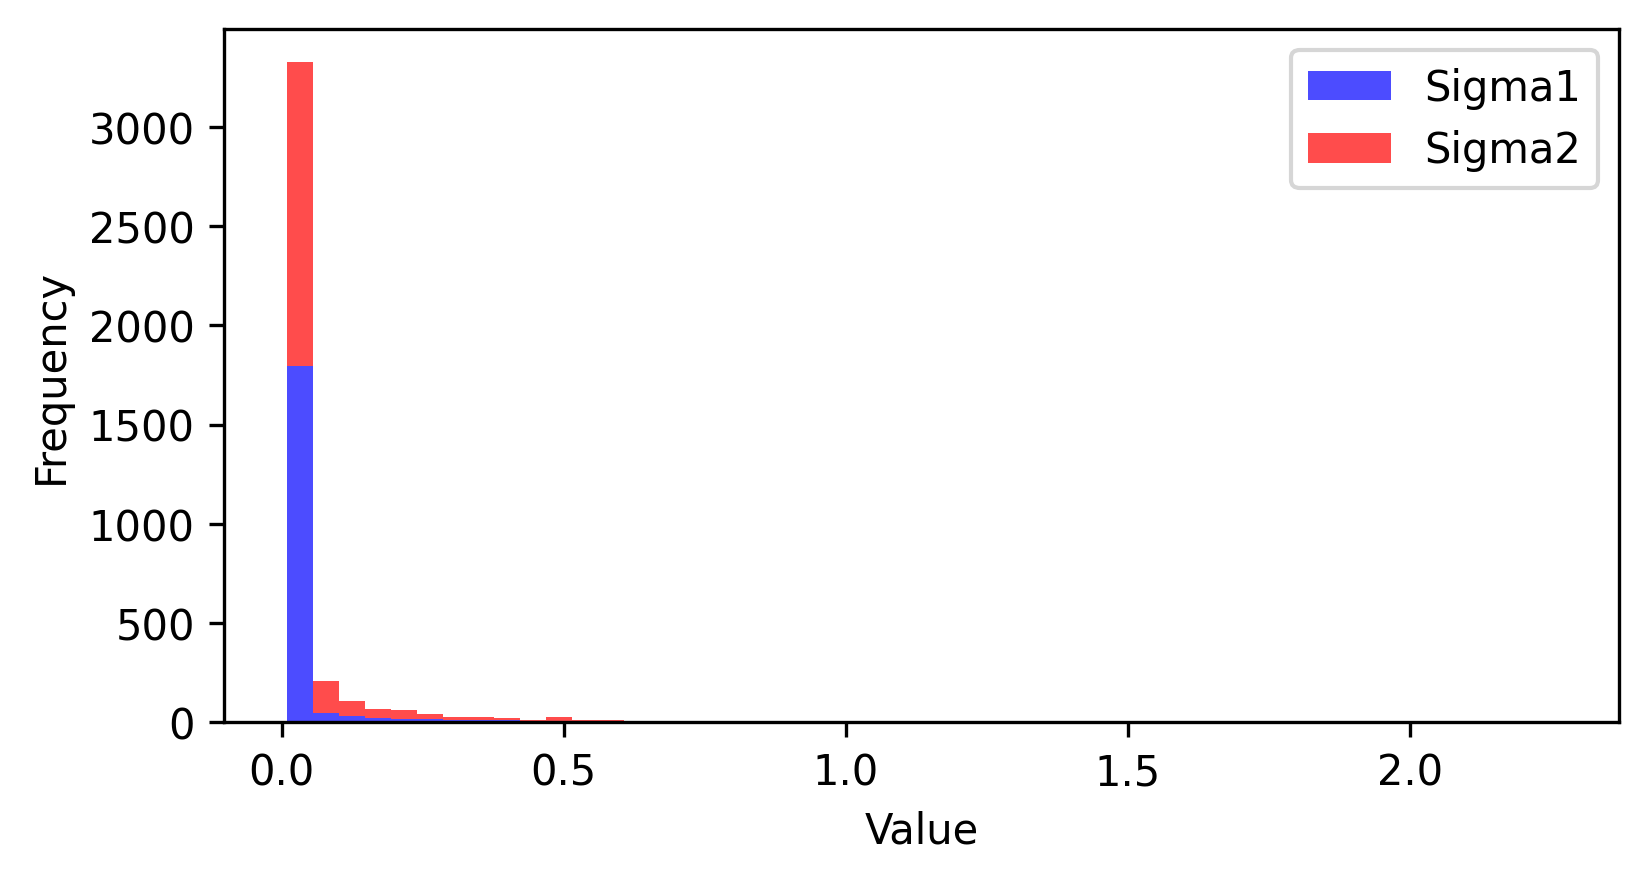

In [4]:
sv.plot_noise_histogram(adata)

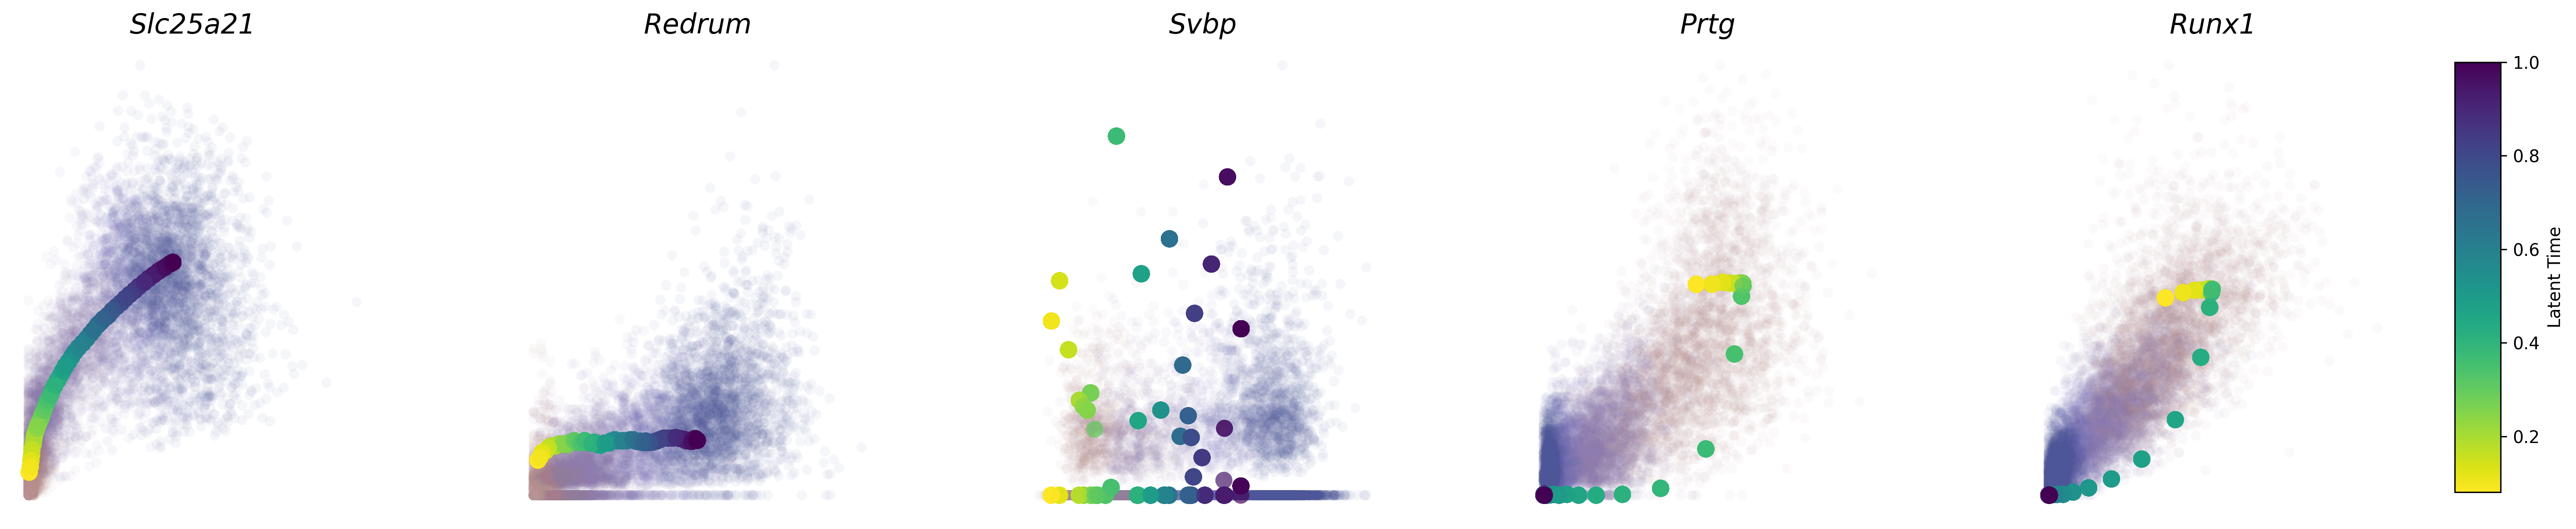

In [5]:
# Define your top genes
top_genes = ['Slc25a21', 'Redrum', 'Svbp', 'Prtg', 'Runx1']

sv.plot_gene_scatter(adata, args, top_genes)
